<a href="https://colab.research.google.com/github/shalujha/Advance_House_Price_Prediction/blob/main/Locally_Weighted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/zk22wgumliiibx1/Locally%20Weighted%20Regression.zip?dl=0

--2021-01-29 10:34:05--  https://www.dropbox.com/s/zk22wgumliiibx1/Locally%20Weighted%20Regression.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zk22wgumliiibx1/Locally%20Weighted%20Regression.zip [following]
--2021-01-29 10:34:05--  https://www.dropbox.com/s/raw/zk22wgumliiibx1/Locally%20Weighted%20Regression.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc357f193acf3a76231643319205.dl.dropboxusercontent.com/cd/0/inline/BH4F1IwAi7XOBc1YVIIwznZ5l0bvIuIDAENqYlRhfOylPmti6-VzMWvOBznq-BtFuf_2BNgHxe1YZsCdmt9PUizOVuTr1sX9Li7bIpDNMtoAFFicp4upzS128UhNUosBLyM/file# [following]
--2021-01-29 10:34:05--  https://uc357f193acf3a76231643319205.dl.dropboxusercontent.com/cd/0/inline/BH4F1IwAi7XOBc1YVIIwznZ5l0bvIuIDAENqY

In [69]:
!unzip 'Locally Weighted Regression.zip?dl=0' -d "data/"

Archive:  Locally Weighted Regression.zip?dl=0
replace data/Locally Weighted Regression/weightedX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# lets see the data:
X=pd.read_csv('/content/data/Locally Weighted Regression/weightedX.csv')
Y=pd.read_csv('/content/data/Locally Weighted Regression/weightedY.csv')
X=X.values
Y=Y.values

In [115]:
'''
X=X.reshape((X.shape[0],))
Y=Y.reshape((Y.shape[0],))
print(X.shape,Y.shape)
'''

'\nX=X.reshape((X.shape[0],))\nY=Y.reshape((Y.shape[0],))\nprint(X.shape,Y.shape)\n'

In [118]:
# normalisation
'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X.shape)
'''
u=X.mean()
std=X.std()
X=(X-u)/std

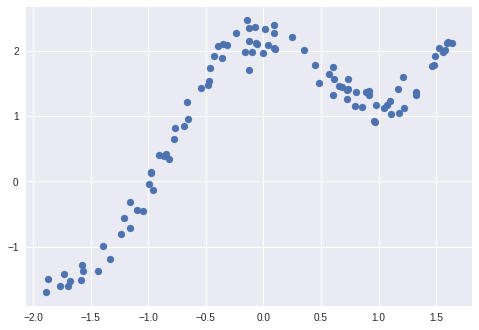

In [119]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

In [120]:
# we first have to find W matrix 
def getW(X,query_point,t):
  W=np.mat(np.eye(X.shape[0]))
  #print('type of W : '+ str(type(W)))
  for i in range(X.shape[0]):
    #print(i)
    den=(-2*t*t)
    num=np.exp(np.dot(X[i][0]-query_point,(X[i][0]-query_point).T)/den)
    #print(num)
    W[i,i]=num/den
  return W

In [121]:
X_modified=np.mat(X)
W=getW(X_modified,1,100)
print(W.shape)
print(W)

(99, 99)
[[-4.99953962e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.99917400e-05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.99954135e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.99975588e-05
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -4.99996099e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -4.99998784e-05]]


In [122]:
# make Predictions:
def make_predictions(X,query_point,tau,Y):
  #print(X.shape,Y.shape)
  ones=np.ones((X.shape[0],1))
  Y=np.mat(Y)
  X=np.concatenate((ones,X),axis=1)
  X_=np.mat(X)
  #print(X.shape,Y.shape)
  query_point=np.mat([1,query_point])
  W=getW(X_,query_point,tau)
  #print(W.shape)
  theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
  prediction=np.dot(query_point,theta)
  #print(X_.shape)
  return theta,prediction

In [135]:
theta,pred=make_predictions(X,10,10,Y)

In [136]:
print(theta)

[[1.03584473]
 [0.78044582]]


In [137]:
# query point was 1 and prediction is 9.44, pretty much good prediction
print(pred)

[[8.84030297]]


In [138]:
from sklearn.model_selection import train_test_split

In [141]:
def plotPredictions(tau):
  predictions=[]
  X_test=np.linspace(-2,2,20)
  for i in range(X_test.shape[0]):
    theta,pred=make_predictions(X,X_test[i],tau,Y)
    predictions.append(pred[0][0])
  #print(X_test)
  #print(predictions)
  X_test=np.asarray(X_test)
  Y_test=np.asarray(predictions)
  plt.scatter(X,Y,c='green')
  plt.scatter(X_test,predictions,c='red')
  plt.title('tau : {} '.format(tau))
  plt.show()

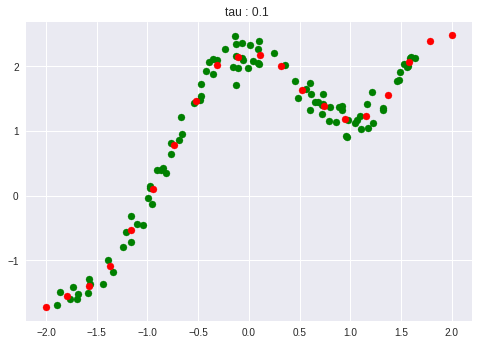

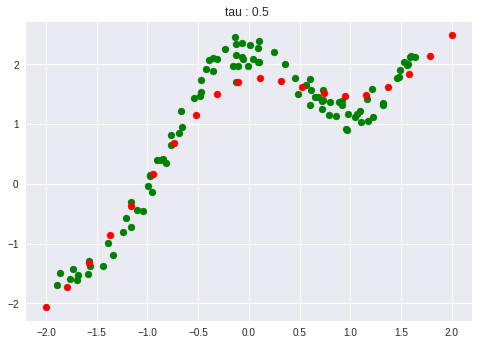

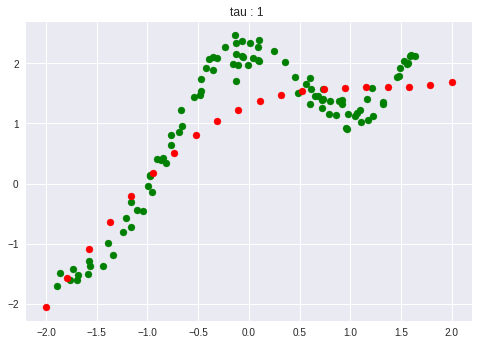

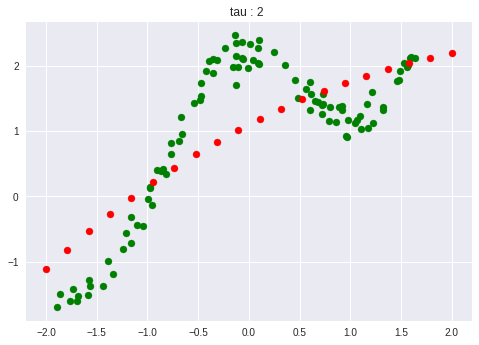

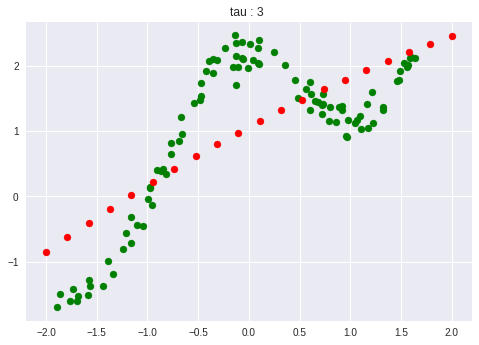

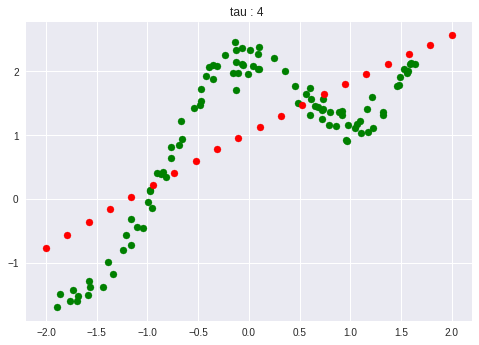

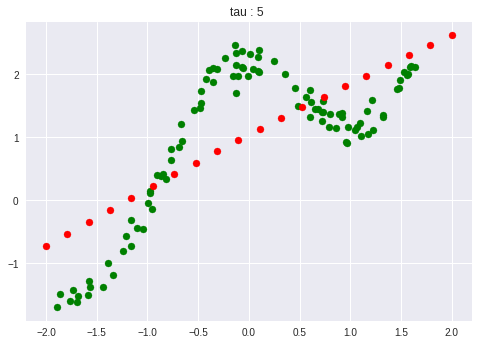

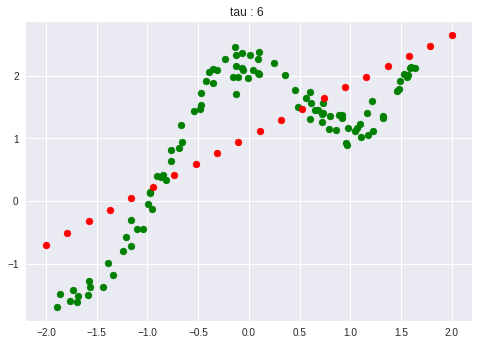

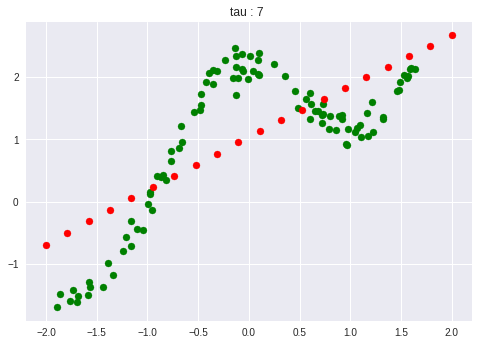

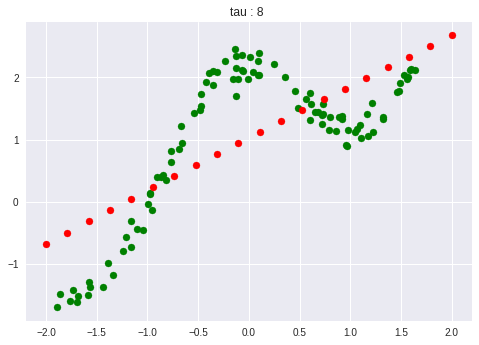

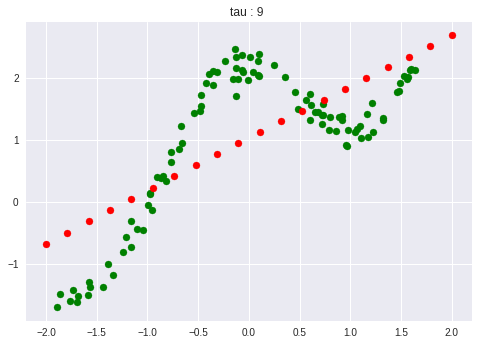

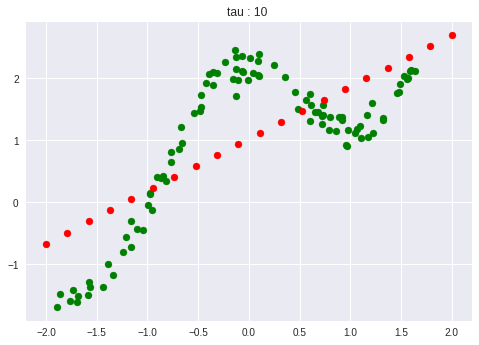

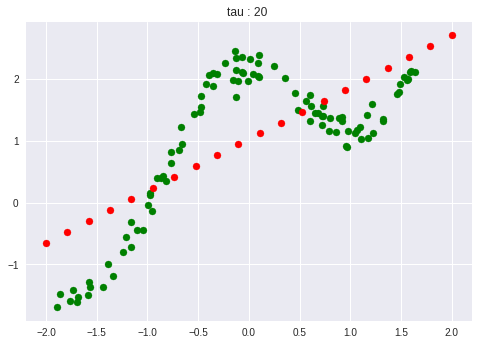

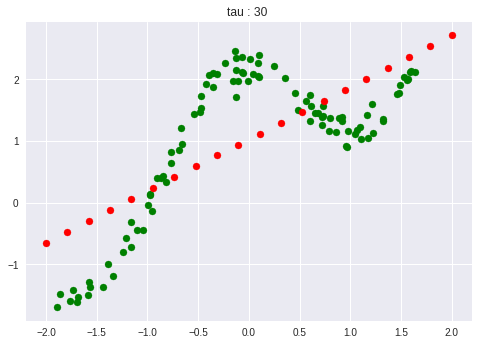

In [142]:
tau=[0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30]
for t in tau:
  plotPredictions(t)

In [98]:
# As we can see from above that as the tau increases, more no of neighbours are given more weight in finding out the parameters of current 
# query point. which means, the deciding factor will also depend upon data points which are farther away. so lesser the tau, more accuracte will be the 
# predictions as we can see from aboe graphs.